In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


C:\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8444 - loss: 0.5133 - val_accuracy: 0.9708 - val_loss: 0.0997
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9718 - loss: 0.0917 - val_accuracy: 0.9788 - val_loss: 0.0654
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9802 - loss: 0.0642 - val_accuracy: 0.9838 - val_loss: 0.0557
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9850 - loss: 0.0441 - val_accuracy: 0.9823 - val_loss: 0.0567
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0401 - val_accuracy: 0.9858 - val_loss: 0.0487
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0309 - val_accuracy: 0.9868 - val_loss: 0.0451
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0286 - val_accuracy: 0.9802 - val_loss: 0.0734
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9913 - loss: 0.0241 - val_accurac

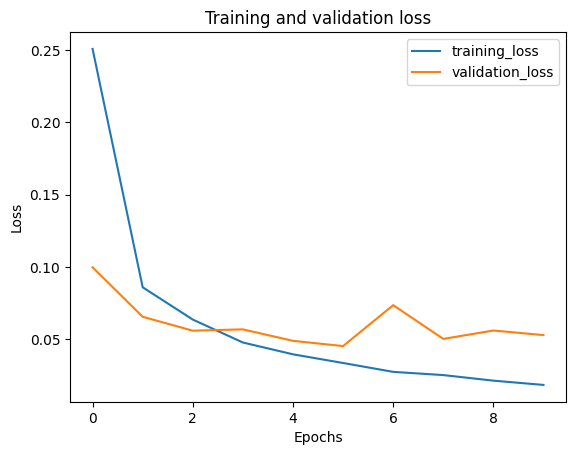

282/282 - 1s - 2ms/step - accuracy: 0.9854 - loss: 0.0592

Test accuracy: 0.9854444265365601
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


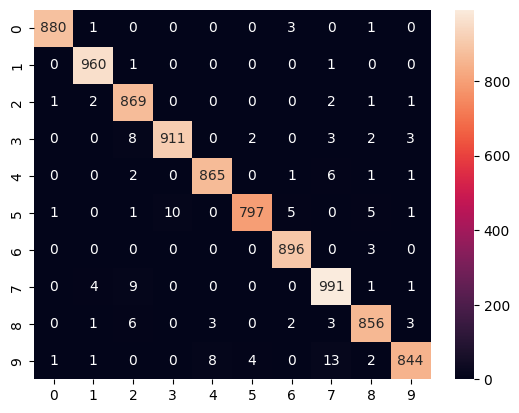

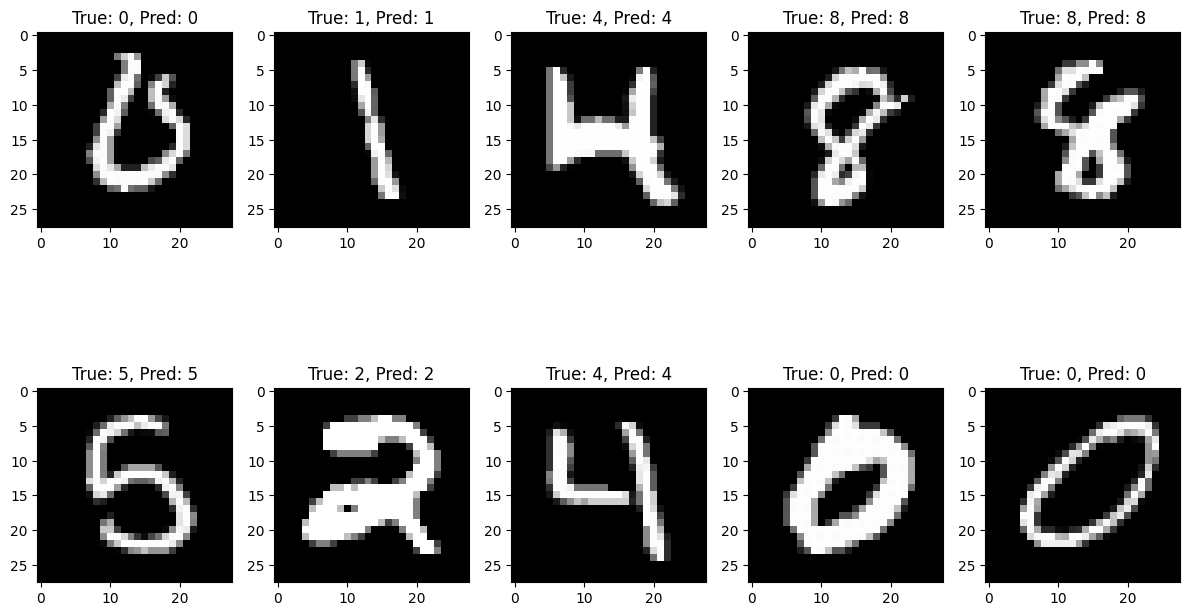

In [4]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the images
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Split the data into train-validation-test sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(val_images, val_labels, test_size=0.6, random_state=42)

# Define the LeNet model
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Plot training & validation loss curves
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Confusion matrix
predictions = model.predict(test_images)
cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
sns.heatmap(cm, annot=True, fmt='d')

# Visualize predictions for 10 random test samples
plt.figure(figsize=(12, 8))
indices = np.random.choice(range(len(test_images)), 10)
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[idx]}, Pred: {np.argmax(predictions[idx])}")
plt.tight_layout()
plt.show()

model.save('my_model.h5')

In [6]:
# Define the parameters
parameters = [
    {'conv_filters': [6, 16], 'dense_neurons': [120, 84]},
    {'conv_filters': [8, 32], 'dense_neurons': [240, 168]},
    {'conv_filters': [10, 64], 'dense_neurons': [480, 336]}
]

# Iterate over the parameters
for param in parameters:
    # Define the model with the current parameters
    model = models.Sequential()
    model.add(layers.Conv2D(param['conv_filters'][0], (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(param['conv_filters'][1], (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(param['dense_neurons'][0], activation='relu'))
    model.add(layers.Dense(param['dense_neurons'][1], activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f'\nTest accuracy with conv_filters={param["conv_filters"]} and dense_neurons={param["dense_neurons"]}:', test_acc)


C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


C:\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8293 - loss: 0.5556 - val_accuracy: 0.9702 - val_loss: 0.0988
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9701 - loss: 0.0972 - val_accuracy: 0.9735 - val_loss: 0.0839
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9788 - loss: 0.0655 - val_accuracy: 0.9800 - val_loss: 0.0617
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9848 - loss: 0.0475 - val_accuracy: 0.9847 - val_loss: 0.0521
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9892 - loss: 0.0353 - val_accuracy: 0.9840 - val_loss: 0.0529
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9903 - loss: 0.0313 - val_accuracy: 0.9870 - val_loss: 0.0488
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9918 - loss: 0.0263 - val_accuracy: 0.9868 - val_loss: 0.0531
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accurac

In [7]:
#best model with Test accuracy 0.9893333315849304  with conv_filters=[8, 32] and dense_neurons=[240, 168]

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9492 - loss: 0.1950 - val_accuracy: 0.9883 - val_loss: 0.0442
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9970 - loss: 0.0103 - val_accuracy: 0.9895 - val_loss: 0.0473
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9975 - loss: 0.0082 - val_accuracy: 0.9880 - val_loss: 0.0582
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9977 - loss: 0.0078 - val_accuracy: 0.9908 - val_loss: 0.0498
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9975 - loss: 0.0075 - val_accuracy: 0.9900 - val_loss: 0.0487
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.9892 - val_loss: 0.0544
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9982 - loss: 0.0058 - val_accuracy: 0.9880 - val_loss: 0.0663
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9977 - loss: 0.0064 - val_accurac

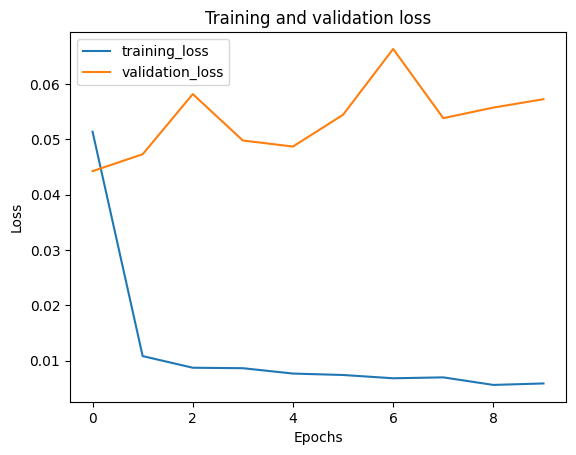

282/282 - 0s - 1ms/step - accuracy: 0.9882 - loss: 0.0718

Test accuracy: 0.9882222414016724
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: >

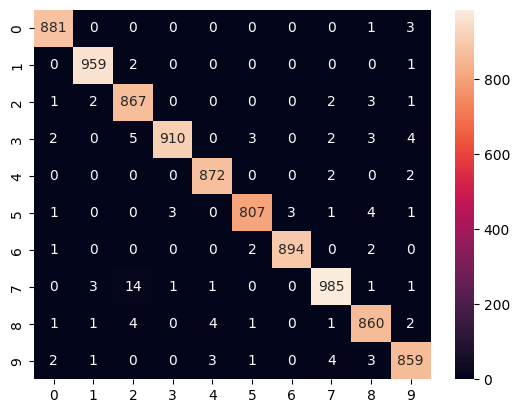

In [15]:

model = tf.keras.models.load_model('my_model.h5')
model.pop()

train_features = model.predict(train_images)
val_features = model.predict(val_images)
test_features = model.predict(test_images)

fnn_model = models.Sequential()
fnn_model.add(layers.Dense(64, activation='relu', input_shape=(train_features.shape[1],)))
fnn_model.add(layers.Dense(10, activation='softmax'))

fnn_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

fnn_history = fnn_model.fit(train_features, train_labels, epochs=10, validation_data=(val_features, val_labels))

# Plot training & validation loss curves
plt.plot(fnn_history.history['loss'], label='training_loss')
plt.plot(fnn_history.history['val_loss'], label='validation_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = fnn_model.evaluate(test_features, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

fnn_predictions = fnn_model.predict(test_features)
cm = confusion_matrix(test_labels, np.argmax(fnn_predictions, axis=1))
sns.heatmap(cm, annot=True, fmt='d')


In [1]:
#both accuracy in ques 1 and 2 are getting nearly same 

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('my_model.h5')

# Function to predict digit
def predict_digit(image):
    resized_image = cv2.resize(image, (28, 28))
    normalized_image = resized_image / 255.0
    # Reshape the image to match the input shape of the model
    input_image = normalized_image.reshape(1, 28, 28, 1)
    # Perform prediction
    prediction = model.predict(input_image)
    # Get the predicted digit
    predicted_digit = np.argmax(prediction)
    return predicted_digit

# Create a window for drawing
image = np.ones((280, 280), dtype=np.uint8) * 0
cv2.namedWindow('image')

# Function to handle mouse events for drawing
def draw(event, x, y, flags, param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(image, (x, y), 10, (255, 255, 255), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.setMouseCallback('image', draw)

drawing = False

while True:
    cv2.imshow('image', image)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('c'):
        image[:, :] = 0
    elif key == ord('d'):
        # Predict the drawn digit
        predicted_digit = predict_digit(image)
        print("Predicted Digit:", predicted_digit)

cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Digit: 1
